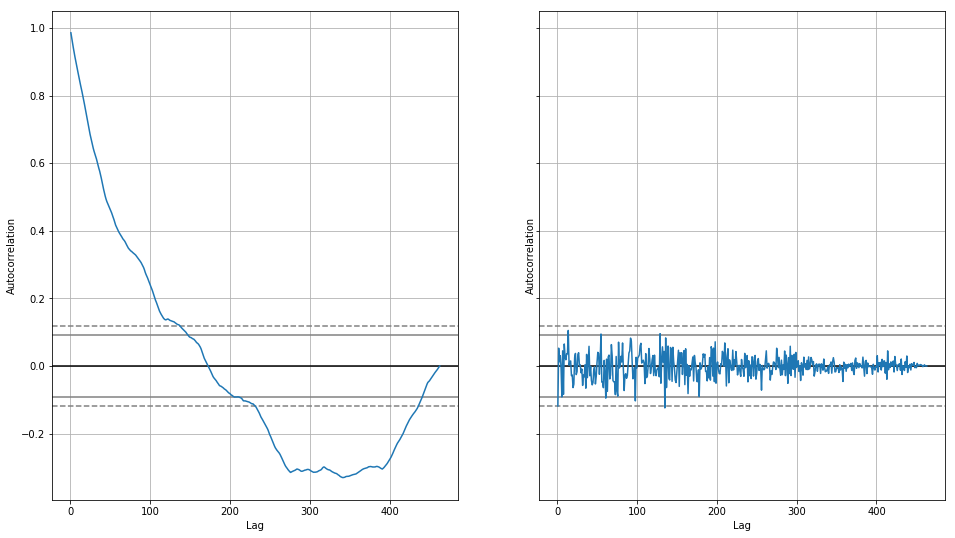

,Close,Volume,Gain,ema_12,ema_26,sma_10,sma_10_20_cross,sma_100,sma_20,sma_200,sma_50,sma_close_20_cross
date,,,,,,,,,,,,
2015-01-02,46.760,27913852,0.002143,47.255732,47.373822,47.3600,UP,46.29595,47.35575,43.458438,47.3905,NaN
2015-01-05,46.325,39673865,-0.000970,47.112542,47.296132,47.4185,NaN,46.32760,47.24900,43.501613,47.4444,NaN
2015-01-06,45.650,36447854,-0.015740,46.887536,47.174196,47.2315,NaN,46.35040,47.12750,43.542163,47.4758,NaN
2015-01-07,46.230,29114061,0.005437,46.786376,47.104256,47.0885,NaN,46.38190,46.99700,43.585963,47.5028,NaN
2015-01-08,47.590,29645202,0.017968,46.910011,47.140237,47.0495,NaN,46.43040,46.99175,43.634613,47.5670,UP


In [2]:
# Prolog - Auto Generated #
import os, matplotlib.pyplot, uuid, pandas
os.chdir(u'C:/Users/felix/PythonEditorWrapper_a4567dfd-f574-4188-8d37-a6779b219d5c')
dataset = pandas.read_csv('input_df_f04cad7d-3eed-42e0-bf17-ccad2fc06e8b.csv')

# Original Script. Please update your script content here and once completed copy below section back to the original editing window #
# The following code to create a dataframe and remove duplicated rows is always executed and acts as a preamble for your script: 

# dataset = pandas.DataFrame(Close, Gain, ema, Volume, date)
# dataset = dataset.drop_duplicates()

# Paste or type your script code here:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
dataset.sort_values(by=['date'], inplace=True, ascending=True)
dataset['date'] = pandas.to_datetime(dataset['date'])
dataset.set_index("date", inplace = True)

fig, axs = pyplot.subplots(1,2,figsize=(16,9), sharey=True)
fig = autocorrelation_plot(dataset["Close"], ax = axs[0])
fig = autocorrelation_plot(dataset["Gain"], ax = axs[1])

pyplot.legend()
pyplot.show()

dataset.describe()
dataset.head()


In [72]:
import numpy as np

np.corrcoef(dataset["Volume"], dataset["ema_12"])
np.corrcoef(dataset["Gain"], dataset["Volume"])
np.corrcoef(dataset["Gain"], dataset["ema_12"])

array([[ 1.        , -0.07501635],
       [-0.07501635,  1.        ]])

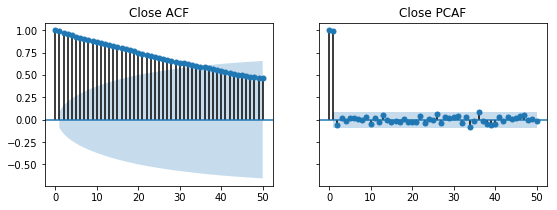

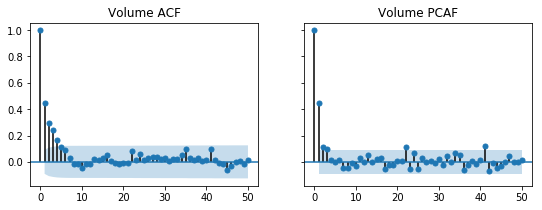

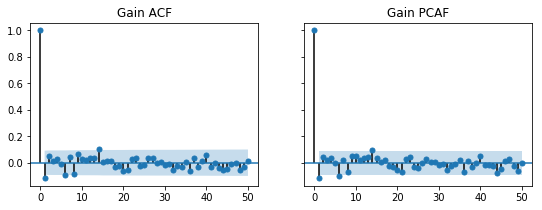

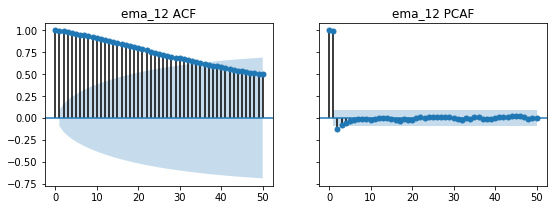

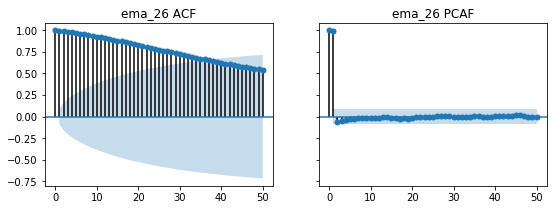

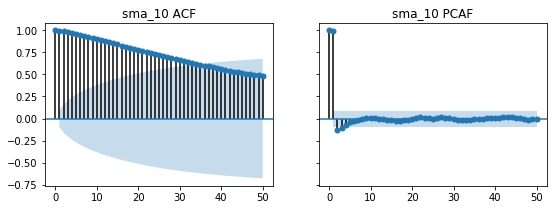

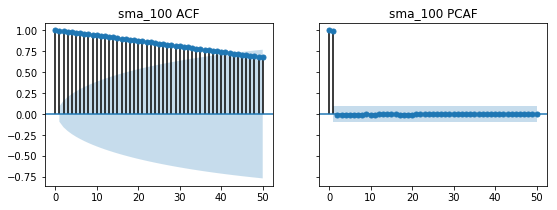

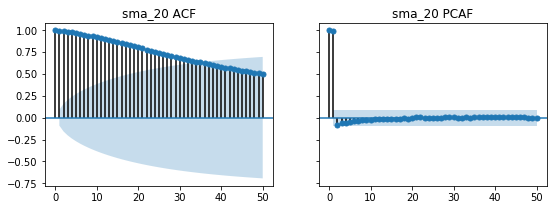

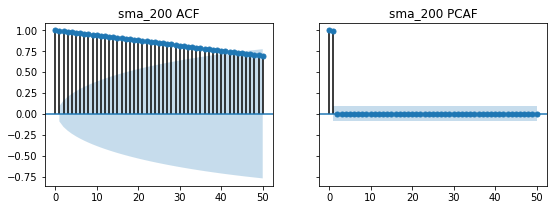

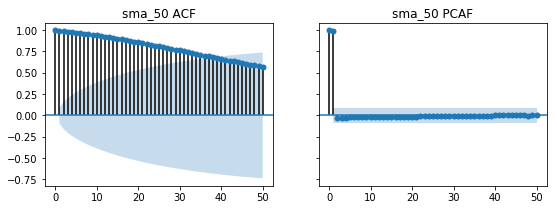

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
from pandas.plotting import lag_plot
import matplotlib.dates as mdates
import seaborn as sns

new_dataset = dataset.drop(['sma_10_20_cross', 'sma_close_20_cross'], axis=1)

for col in new_dataset.columns:
    #print(new_dataset[col].head())
    fig, axs = pyplot.subplots(1, 2, figsize=(9, 3), sharey=True)
    fig = plot_acf(new_dataset[col], lags=50, title=col + " ACF", ax = axs[0])
    fig = plot_pacf(new_dataset[col], lags=50, title=col + " PCAF", ax = axs[1])
    #fig.suptitle('')
pyplot.show()


#Are we using Auto-Regressive (AR), or Moving Average (MA) in our ARIMA model
#Gradual Decline suggests MA and Sharp Drop-Off suggests AR

#ACF


#PACF 
#Conditional corellation
#corellation of 2 variables in consideration of the relationship between the dependent, and independent variables with other independent variables

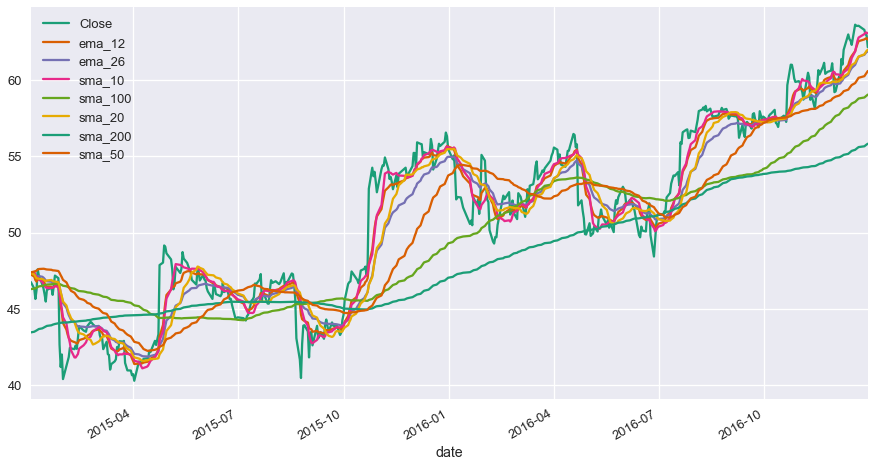

In [75]:
import statsmodels.api as sm

dataset.drop(['Volume', 'Gain'],axis=1).plot(figsize=(15,8))
pyplot.show()

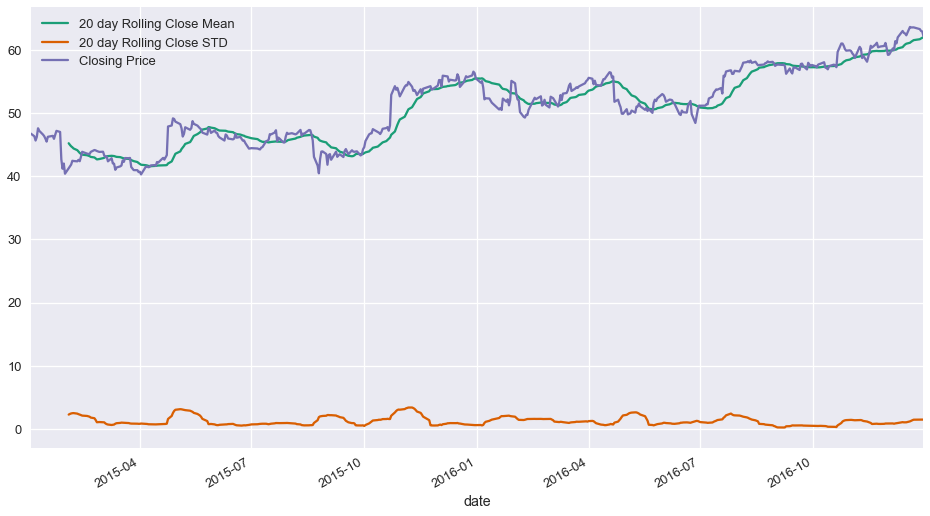

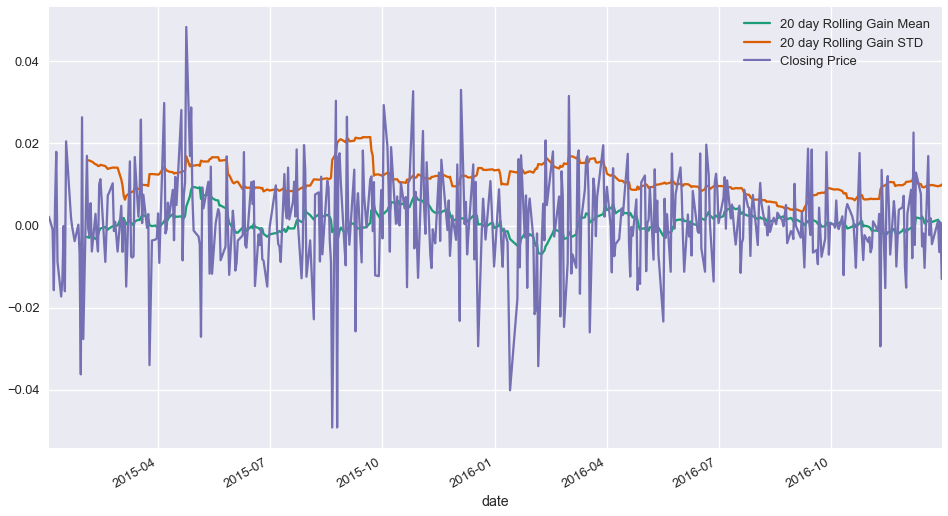

In [74]:
fig, ax = pyplot.subplots(figsize=(16,9))

#https://www.udemy.com/python-for-finance-and-trading-algorithms/
    
time_series=dataset['Close']
time_series.rolling(20).mean().plot(label='20 day Rolling Close Mean')
time_series.rolling(20).std().plot(label='20 day Rolling Close STD')
time_series.plot(label="Closing Price")
pyplot.legend()
pyplot.show()


fig, ax = pyplot.subplots(figsize=(16,9))
time_series=dataset['Gain']
time_series.rolling(20).mean().plot(label='20 day Rolling Gain Mean')
time_series.rolling(20).std().plot(label='20 day Rolling Gain STD')
time_series.plot(label="Closing Price")
pyplot.legend()
pyplot.show()

date
2015-01-02   -0.024208
2015-01-05    0.129091
2015-01-06    0.045361
2015-01-07   -0.056306
2015-01-08   -0.193970
Name: Close, dtype: float64


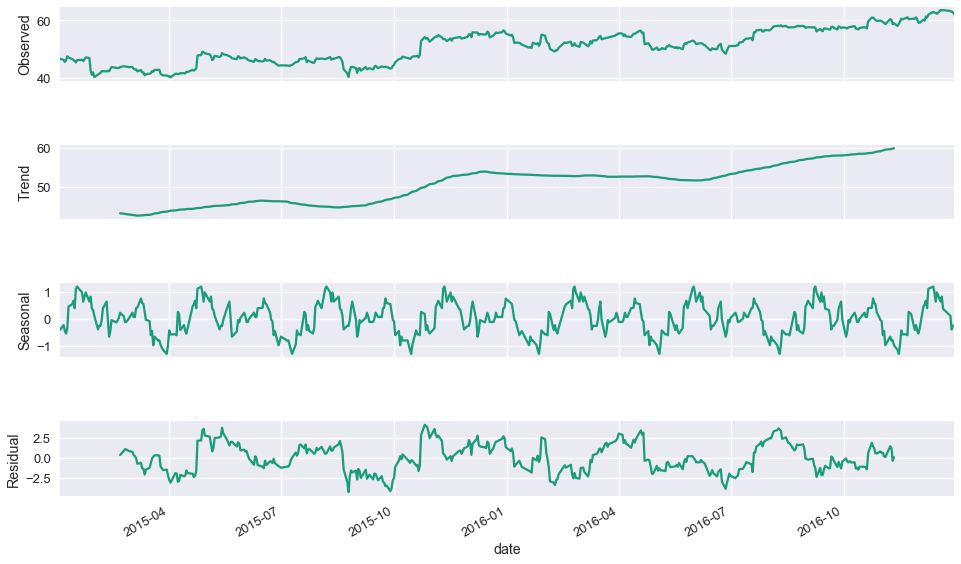

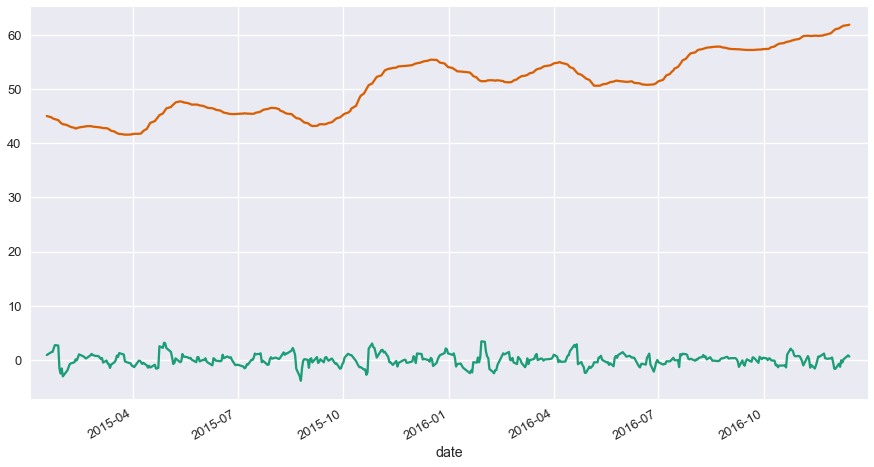

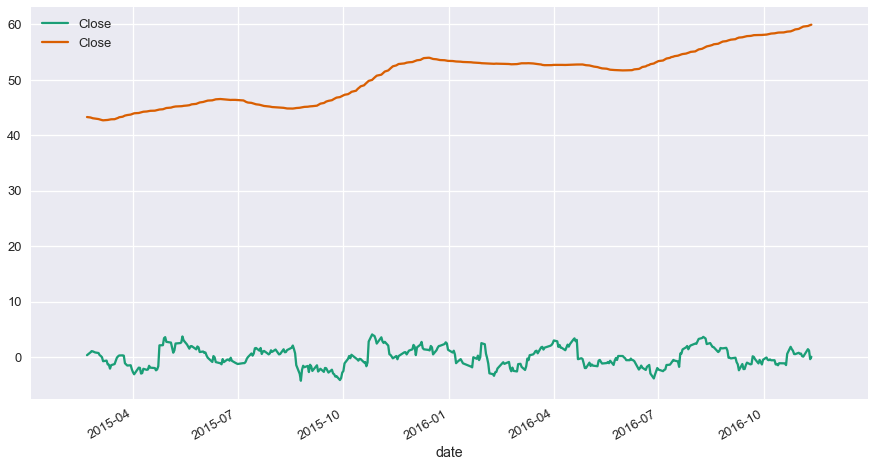

In [91]:
### Error trend and seasonality decomposition - ETSD
#linear or exponential trend
%matplotlib inline

print(decomp_multi.seasonal.head())

from statsmodels.tsa.seasonal import seasonal_decompose
time_series=dataset['Close']
decomp_add_63 = seasonal_decompose(time_series, freq = 63, model='additive')
decomp_add_21 = seasonal_decompose(time_series, freq = 21, model='additive')

fig = decomp_add.plot()
fig.set_size_inches(15,10)
pyplot.show()
decomp_add_21.resid.plot()
decomp_add_21.trend.plot(figsize=(15,8))
pyplot.show()
decomp_add_63.resid.plot()
decomp_add_63.trend.plot(figsize=(15,8))
pyplot.legend()

In [97]:
###Augmented Dicky Fuller Test - Test for seasonality
#null hypothesis : Data has unit root and is non-stationary
#p-value less than 0.05 will result in rejection of null hypothesis

from statsmodels.tsa.stattools import adfuller

result=adfuller(dataset['Close'])

def adf_check(time_series):
#Function zips results with appropriate labels for the tupple, and display on screen    
    
    result= adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    
    for value, label in zip(result, labels):
        print(label+' : ' + str(value))
    
    print("")
    
    #p-value results
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print("Weak evidence against null hypothesis")
        print('fail to reject null hypothesis')
        print('Data has unit root and is non-stationary')
        
adf_check(dataset['Close'])

 Augmented Dicky-Fuller Test
ADF Test Statistic : -0.954905812107
p-value : 0.769354200671
# of lags : 0
Num of Observations used : 462

Weak evidence against null hypothesis
fail to reject null hypothesis
Data has unit root and is non-stationary


In [ ]:
#ARIMA
#p - # of lag observations
#d - # of times raw observations are differenced
#q - Size of the moving average

#Seasonal P,D,Q